<a href="https://colab.research.google.com/github/mahesh15698/RAG_Implementation_from_Scratch/blob/main/RAG_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this Notebook We are going to create basic RAG System using the concept of Cosine Similarity

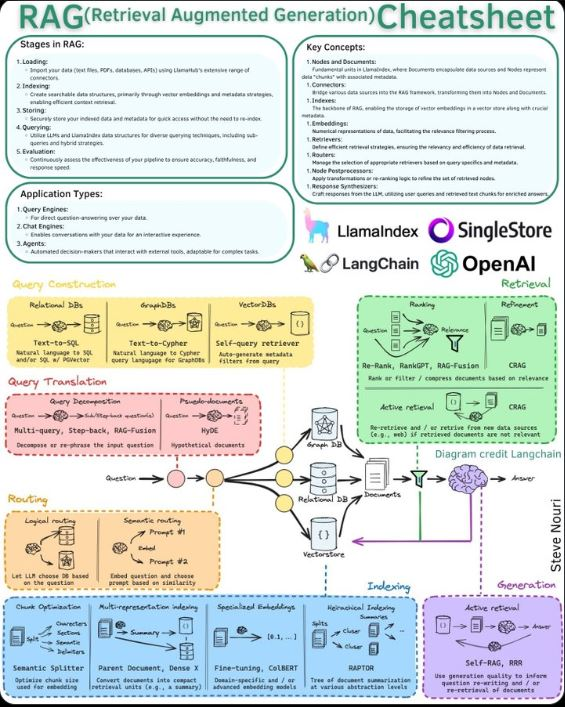

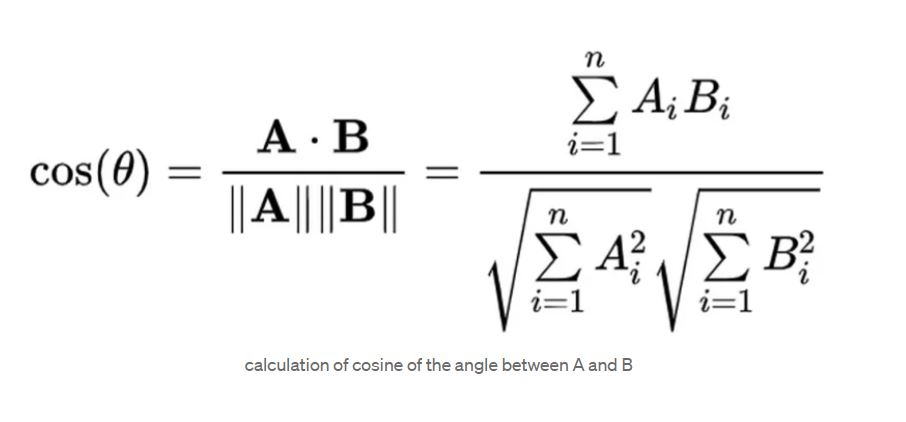

We are going to see How to calculate the cosine similarity between Query and Database(Corpus) in the RAG to get accurate result bases on similarity score.

First will create code for Calculate code for Cosine Similarity.

In [ ]:
Query = "What is a Machine learning?"
Document= "Machine Learning is a subpart of AI"


We need to create tokens of each sentence to create a collection of tokens with their counts

In [ ]:
Qtokons= Query.lower().split(" ")
Dtokons= Document.lower().split(" ")

In [ ]:
Qtokons

['what', 'is', 'a', 'machine', 'learning?']

In [ ]:
Dtokons

['machine', 'learning', 'is', 'a', 'subpart', 'of', 'ai']

In [ ]:
from collections import Counter
count_Qtokons= Counter(Qtokons)
count_Dtokons= Counter(Dtokons)

In [ ]:
count_Qtokons

Counter({'what': 1, 'is': 1, 'a': 1, 'machine': 1, 'learning?': 1})

Then we are calculating dot product of similar word between documnet and query.Then get list of word vector of that. After this we calculate Sum of dot of product this vector.

In [ ]:
word_vec = []
for tokons in count_Qtokons.keys() & count_Dtokons.keys():
  word_vec.append(count_Qtokons[tokons]*count_Dtokons[tokons])

In [ ]:
word_vec

[1, 1, 1]

In [ ]:
sum_of_wordvec= sum(word_vec)

In [ ]:
sum_of_wordvec

3

Now we have sum of word vector and need to calculate magnitude of Query and Document in order to calculate consine similarity

In [ ]:
import math
Qmagnitude = math.sqrt(sum((count_Qtokons[tokons])**2 for tokons in count_Qtokons))
Dmagnitude = math.sqrt(sum((count_Dtokons[tokons])**2 for tokons in count_Dtokons))


In [ ]:
Qmagnitude

2.23606797749979

In [ ]:
Dmagnitude

2.6457513110645907

# Cosine Similarity

In [ ]:
# formula of consine similarity
similarity = sum_of_wordvec/(Qmagnitude*Dmagnitude)

In [ ]:
similarity

0.5070925528371099

In [ ]:
Sum_of_dot_prod = sum(count_Qtokons[tokens]*count_Dtokons[tokens] for tokens in count_Dtokons.keys() and count_Qtokons.keys())

In [ ]:
Sum_of_dot_prod

3

### Insted of doing it manually we can create function for this to make easy to use

In [ ]:
from collections import Counter
import math
def cosine_similarity(query,document):
  """
  This function takes query sentence and document as input
  and calculate cosine similarity between them
  """
  #Create tokons
  Qtokons= query.lower().split(" ")
  Dtokons= document.lower().split(" ")
  #Create count dictionary of query tokens and document tokens
  count_Dtokons = Counter(Qtokons)
  count_Qtokons = Counter(Dtokons)

  #Calculate Sum of Dot product of common word count from both query and document Counter

  Sum_of_dot_prod = sum(count_Qtokons[tokens]*count_Dtokons[tokens] for tokens in count_Dtokons.keys() and count_Qtokons.keys())

  # Calculate magnitude of Query and Document
  Qmagnitude = math.sqrt(sum((count_Qtokons[tokons])**2 for tokons in count_Qtokons))
  Dmagnitude = math.sqrt(sum((count_Dtokons[tokons])**2 for tokons in count_Dtokons))

  similarity= Sum_of_dot_prod/(Qmagnitude*Dmagnitude)
  return similarity


In [ ]:
Query = "What is a Machine learning?"
Document= "Machine Learning is a subpart of AI"
Score = cosine_similarity(Query,Document)

print(f"similarity score is {Score}")

similarity score is 0.5070925528371099


In [ ]:
text_corpus = [
    "Machine learning is a subset of artificial intelligence.",
    "Supervised learning involves learning a function that maps inputs to outputs based on example input-output pairs.",
    "Unsupervised learning involves learning patterns from unlabeled data.",
    "Reinforcement learning involves an agent learning to make decisions by interacting with an environment.",
    "Deep learning is a subset of machine learning that uses neural networks with multiple layers to learn complex patterns in data.",
    "Natural language processing (NLP) is a field of study focused on making computers understand, interpret, and generate human language.",
    "Classification is a type of machine learning task where the goal is to predict a discrete label or category for a given input.",
    "Regression is a type of machine learning task where the goal is to predict a continuous value for a given input.",
    "Clustering is a type of unsupervised learning task where the goal is to group similar data points together based on their features.",
    "Overfitting occurs when a machine learning model learns to perform well on the training data but fails to generalize to new, unseen data.",
    "Feature engineering is the process of selecting, transforming, and creating new features from the raw data to improve the performance of machine learning models.",
    "Hyperparameters are parameters that are set before the training process begins and control aspects such as the complexity of the model and the learning rate.",
    "Cross-validation is a technique used to assess the performance of machine learning models by splitting the data into multiple subsets and training/testing the model on different combinations of these subsets.",
    "Bias refers to the error introduced by approximating a real-world problem with a simplified model.",
    "Variance refers to the amount by which the model's predictions vary as a result of the variability in the training data.",
    "The bias-variance tradeoff is the balance between bias and variance in a machine learning model, where reducing one often leads to an increase in the other.",
    "Ensemble methods combine multiple machine learning models to improve predictive performance.",
    "Some popular ensemble methods include bagging, boosting, and stacking.",
    "Decision trees are a popular class of machine learning algorithms that recursively split the data into subsets based on the value of certain features.",
    "Random forests are an ensemble learning method that consists of multiple decision trees trained on different subsets of the data and averaging their predictions.",
    "Gradient boosting is an ensemble learning method that builds models sequentially, with each new model correcting the errors of the previous ones.",
    "Support vector machines (SVMs) are a class of supervised learning algorithms used for classification and regression tasks.",
    "Neural networks are a class of machine learning algorithms inspired by the structure and function of the human brain."
]


### Now lets assume we have one database or Corpus and we have one query. We are going to find out similarity search.

In [ ]:
def responseforquery(query,corpus):
  similarities= []
  for doc in corpus:
    similarity= cosine_similarity(query,doc)
    similarities.append(similarity)
  return text_corpus[similarities.index(max(similarities))]

In [ ]:
query1 = "what is unsupervised learning"

In [ ]:
responseforquery(query1,text_corpus)

'Unsupervised learning involves learning patterns from unlabeled data.'

In [ ]:
query2 = "what is Machine learning"

In [ ]:
responseforquery(query2,text_corpus)

'Machine learning is a subset of artificial intelligence.'

In [ ]:
query3 = "What is Clustering"

In [ ]:
responseforquery(query3,text_corpus)

'Clustering is a type of unsupervised learning task where the goal is to group similar data points together based on their features.'

In [ ]:
query4 = "What is Gradient boosting"

In [ ]:
responseforquery(query4,text_corpus)

'Gradient boosting is an ensemble learning method that builds models sequentially, with each new model correcting the errors of the previous ones.'

In [ ]:
query5 = "What is Deep Learning"

In [ ]:
responseforquery(query5,text_corpus)

'Deep learning is a subset of machine learning that uses neural networks with multiple layers to learn complex patterns in data.'

### How can you you configure LLM in your Local System(For example Llama2)

### We are going to use OLlama to install Llama2 LLM in your Local. I am going to use 7 Billion parameters of Llama2 model(3.8GB size required)

### Now I am going to Augment this responce

In [ ]:
user_input = "What is Deep Learning?"
relevant_document = responseforquery(User_input,text_corpus)

In [ ]:
relevant_document

'Deep learning is a subset of machine learning that uses neural networks with multiple layers to learn complex patterns in data.'

In [ ]:
import requests
import json
full_response=[]

In [ ]:
# full_response=[]
prompt="""
You are bot that answer for Machine learning and deep learning question and You answer in very short sentences and do not include extra information
This is the Machine learning and deep learning information : {relevant_document}
The user input is: {user_input}
Compile answer based on the Machine learning and deep learning information and user input.
"""


url= "http://localhost:11434/api/generate"
data = {
    "model": "llama2",
    "prompt": prompt.format(user_input=user_input, relevant_document=relevant_document)
}

headers = {'Content-Type': 'application/json'}

response = requests.post(url, data=json.dumps(data), headers=headers, stream=True)


try:
    for line in response.iter_lines():
        # filter out keep-alive new lines
        if line:
            decoded_line = json.loads(line.decode('utf-8'))
            # print(decoded_line['response'])  # uncomment to results, token by token
            full_response.append(decoded_line['response'])
finally:
    response.close()


print(''.join(full_response))

Deep learning is a type of machine learning that utilizes neural networks with multiple layers to uncover intricate patterns in data.
